# Body Fat Prediction

In [38]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict


#### Getting data

In [39]:
# Getting data

bodyfat = pd.read_csv("bodyfat.csv")
df = pd.DataFrame(bodyfat)

#### Outliers detection

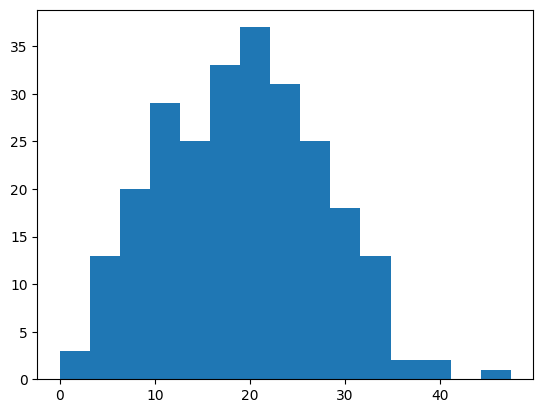

In [40]:
plt.hist(df['BodyFat'], bins = 15)
plt.show()

#### Removing outliers

In [41]:
# Removing outliers

# upperLimit = df['Weight'].quantile(0.99)
# lowerLimit = df['Weight'].quantile(0.01)
# df = df[(df['Weight'] > lowerLimit) & (df['Weight'] < upperLimit)]
# df.shape

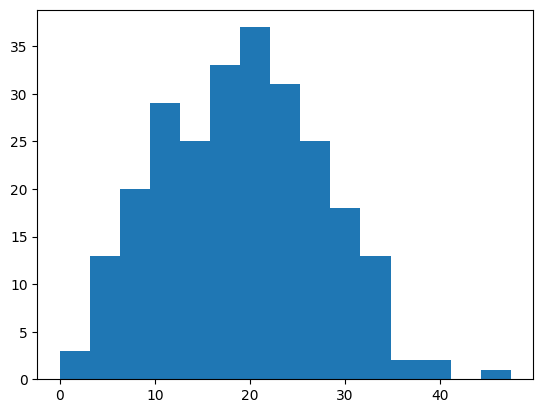

In [42]:
plt.hist(df['BodyFat'], bins = 15)
plt.show()

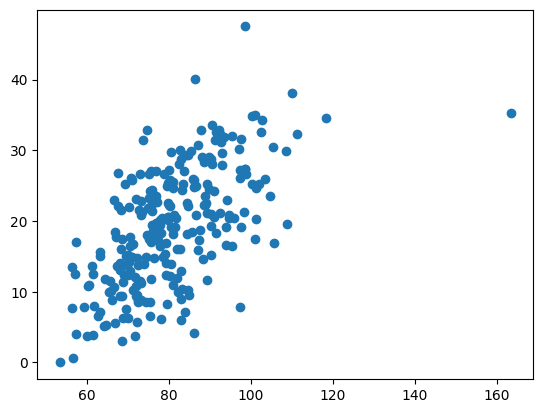

In [78]:
plt.plot(df["Weight"]*0.45, df["BodyFat"], "o")

In [ ]:
plt.plot(df["Abdomen"], df["BodyFat"], "o")

#### Splitting data

In [43]:
labels = df['BodyFat']
features = df.drop(columns=['Density', 'BodyFat'])

In [44]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

features_norm = StandardScaler().fit_transform(features)

#### Labeling data 

In [45]:
scaler = StandardScaler()
x = scaler.fit_transform(features)
y = labels

#### Feature Selection

Pearson Correlation

In [46]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # feature name
    corr_feat = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in corr_feat else False for i in feature_name]
    return cor_support, corr_feat

num_feats = 13
cor_support, corr_feat = cor_selector(features, labels,num_feats)
print(str(len(corr_feat)), 'selected features')
corr_feat = corr_feat[::-1]
corr_feat

13 selected features


['Abdomen',
 'Chest',
 'Hip',
 'Weight',
 'Thigh',
 'Knee',
 'Biceps',
 'Neck',
 'Forearm',
 'Wrist',
 'Age',
 'Ankle',
 'Height']

Recursive Feature Elimination (RFE)

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(features_norm, labels)
rfe_support = rfe_selector.get_support()
rfe_feat = features.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feat)), 'selected features')
rfe_feat

13 selected features


['Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# creating a pipeline to scale and model
pipeline = Pipeline([('sc',StandardScaler()),('model',Lasso())])
# gridsearch over the pipeline to find the best alpha for lasso
# scoring is picked as mean squared error
lassocv = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.2)},
                      cv = 5, scoring="neg_root_mean_squared_error"
                      )
# fitting to the model
lassocv.fit(features_norm, labels)

# dataframe of variables, coefficients and absolute coefficients 
coefs = pd.DataFrame({'variable':features.columns,
                      'coef':lassocv.best_estimator_.named_steps['model'].coef_,
                      'abs_coef':np.abs(lassocv.best_estimator_.named_steps['model'].coef_)})

# sorting based on the absolute of the coefficients
coefs.sort_values('abs_coef', inplace=True, ascending=False)

coefs.head(20)
lasso_feat = coefs.variable[:]
lasso_feat = lasso_feat.tolist()
lasso_feat


['Abdomen',
 'Wrist',
 'Weight',
 'Neck',
 'Age',
 'Forearm',
 'Height',
 'Hip',
 'Thigh',
 'Biceps',
 'Chest',
 'Knee',
 'Ankle']

In [49]:
# MinMaxScler

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler((0, 1))
# x = scaler.fit_transform(features)
# y = labels

#### Splitting data

In [50]:
# Splitting Dataframe

x = pd.DataFrame(x, columns = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'])
x1 = x[['Abdomen']]
x2 = x[['Abdomen', 'Chest']]
x3 = x[['Abdomen', 'Chest', 'Hip']]
x4 = x[['Abdomen', 'Chest', 'Hip', 'Weight']]
x5 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh']]
x6 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee']]
x7 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps']]
x8 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck']]
x9 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm']]
x10 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist']]
x11 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age']]
x12 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle']]
x13 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']]

In [51]:
# Setting training set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=42)
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=42)
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size=0.3, random_state=42)
x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size=0.3, random_state=42)
x6_train, x6_test, y_train, y_test = train_test_split(x6, y, test_size=0.3, random_state=42)
x7_train, x7_test, y_train, y_test = train_test_split(x7, y, test_size=0.3, random_state=42)
x8_train, x8_test, y_train, y_test = train_test_split(x8, y, test_size=0.3, random_state=42)
x9_train, x9_test, y_train, y_test = train_test_split(x9, y, test_size=0.3, random_state=42)
x10_train, x10_test, y_train, y_test = train_test_split(x10, y, test_size=0.3, random_state=42)
x11_train, x11_test, y_train, y_test = train_test_split(x11, y, test_size=0.3, random_state=42)
x12_train, x12_test, y_train, y_test = train_test_split(x12, y, test_size=0.3, random_state=42)

In [52]:
# Performance Evaluation Criteria

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
# from sklearn.metrics import d2_absolute_error_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

# Linear Regression

### Model

In [53]:
from sklearn.linear_model import LinearRegression

def linRegModel(x_train, y_train = y_train):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    return lin_reg

In [54]:

count = 1
while count <= 13:
    x_rfe = x[rfe_feat[:count]]
    x_pearson = x[corr_feat[:count]]
    x_lasso = x[lasso_feat[:count]]

    x_pearson_train, x_pearson_test, y_train, y_test = train_test_split(x_pearson, y, test_size=0.3, random_state=42)
    x_rfe_train, x_rfe_test, y_train, y_test = train_test_split(x_rfe, y, test_size=0.3, random_state=42)
    x_lasso_train, x_lasso_test, y_train, y_test = train_test_split(x_lasso, y, test_size=0.3, random_state=42)

    pearson = linRegModel(x_pearson_train)
    pearson_pred = pearson.predict(x_pearson_test)
    scores = cross_val_score(pearson, x_pearson_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=10)
    print("Pearson Correlation for {} features".format(count))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(), "\n")

    rfe = linRegModel(x_rfe_train)
    rfe_pred = rfe.predict(x_rfe_test)
    scores = cross_val_score(rfe, x_rfe_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=10)
    print("RFE for {} features".format(count))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(), "\n")

    lasso = linRegModel(x_lasso_train)
    lasso_pred = lasso.predict(x_lasso_test)
    scores = cross_val_score(lasso, x_lasso_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=10)
    print("Lasso for {} features".format(count))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(), "\n")

    count += 1

Pearson Correlation for 1 features
Mean: -71652330683367.45
Standard deviation: 214956992050101.28 

RFE for 1 features
Mean: -464856174920328.5
Standard deviation: 1394568524760983.5 

Lasso for 1 features
Mean: -71652330683367.45
Standard deviation: 214956992050101.28 

Pearson Correlation for 2 features
Mean: -118774976667437.22
Standard deviation: 356324930002310.6 

RFE for 2 features
Mean: -157669656925886.6
Standard deviation: 473008970777658.6 

Lasso for 2 features
Mean: -97455738088314.45
Standard deviation: 292367214264942.3 

Pearson Correlation for 3 features
Mean: -128407742454471.1
Standard deviation: 385223227363412.4 

RFE for 3 features
Mean: -158813707497818.8
Standard deviation: 476441122493455.06 

Lasso for 3 features
Mean: -104128084137388.62
Standard deviation: 312384252412164.8 

Pearson Correlation for 4 features
Mean: -114035661703616.7
Standard deviation: 342106985110849.1 

RFE for 4 features
Mean: -158975719137919.7
Standard deviation: 476927157413757.75 


In [55]:
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit

model = LinearRegression()
k_folds = KFold(n_splits = 5)
ss = ShuffleSplit(train_size=0.7, test_size=0.3, n_splits = 3)
scores = cross_val_score(model, features, labels, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.699987   0.73854678 0.64457823]
Average CV Score:  0.6943706719651824
Number of CV Scores used in Average:  3


In [56]:
def cvScores(x_train, x_test, criteria):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    # y_pred = lin_reg.predict(x_test)
    scores = cross_val_score(lin_reg, x, y, scoring=criteria, cv=10)
    # print("Mean:", scores.mean())
    # print("Standard deviation:", scores.std())
    return scores.mean()

#### Evaluating model

In [57]:
evs = []
max_e = []
mean_ae = []
mse = []
msle = []
mae = []
r2 = []
mape = []

def evaluatingModel(y_pred,  x_train, x_test):
    evs.append(explained_variance_score(y_test, y_pred).round(4))
    max_e.append(max_error(y_test, y_pred).round(4))
    mean_ae.append(mean_absolute_error(y_test, y_pred).round(4))
    mse.append(mean_squared_error(y_test, y_pred).round(4))
    msle.append(mean_squared_log_error(y_test, y_pred).round(4))
    mae.append(median_absolute_error(y_test, y_pred).round(4))
    r2.append(r2_score(y_test, y_pred).round(4))
    mape.append(mean_absolute_percentage_error(y_test, y_pred).round(4))
    df = pd.DataFrame()
    df.insert(0, 'EVS', evs)
    df.insert(1, 'Max E', max_e)
    df.insert(2, 'Mean AE', mean_ae)
    df.insert(3, 'MSE', mse)
    df.insert(4, 'MSLE', msle)
    df.insert(5, 'MAE', mae)
    df.insert(6, 'R2', r2)
    df.insert(7, 'MAPE', mape)
    df.to_csv('erros.csv')
    return df

In [58]:
# Evaluating Model

evs = []
evs_cv = []
max_e = []
max_e_cv = []
mean_ae = []
mean_ae_cv = []
mse = []
mse_cv = []
msle = []
msle_cv = []
mae = []
mae_cv = []
r2 = []
r2_cv = []
mape = []
mape_cv = []

def evaluatingLinReg( x_train, x_test):
    y_pred = linRegModel(x_train).predict(x_test)
    evs.append(explained_variance_score(y_test, y_pred).round(4))
    evs_cv.append(cvScores(x_train, x_test, 'explained_variance').round(4))
    max_e.append(max_error(y_test, y_pred).round(4))
    max_e_cv.append(cvScores(x_train, x_test, 'max_error').round(4))
    mean_ae.append(mean_absolute_error(y_test, y_pred).round(4))
    mean_ae_cv.append(cvScores(x_train, x_test, 'neg_mean_absolute_error').round(4))
    mse.append(mean_squared_error(y_test, y_pred).round(4))
    mse_cv.append(cvScores(x_train, x_test, 'neg_mean_squared_error').round(4))
    msle.append(mean_squared_log_error(y_test, y_pred).round(4))
    msle_cv.append(cvScores(x_train, x_test, 'neg_mean_squared_log_error').round(4))
    mae.append(median_absolute_error(y_test, y_pred).round(4))
    mae_cv.append(cvScores(x_train, x_test, 'neg_median_absolute_error').round(4))
    r2.append(r2_score(y_test, y_pred).round(4))
    r2_cv.append(cvScores(x_train, x_test, 'r2').round(4))
    mape.append(mean_absolute_percentage_error(y_test, y_pred).round(4))
    mape_cv.append(cvScores(x_train, x_test, 'neg_mean_absolute_percentage_error').round(4))
    df = pd.DataFrame()
    df.insert(0, 'EVS', evs)
    df.insert(1, 'EVS CV', evs_cv)
    df.insert(2, 'Max E', max_e)
    df.insert(3, 'Max E CV', max_e_cv)
    df.insert(4, 'Mean AE', mean_ae)
    df.insert(5, 'Mean AE CV', mean_ae_cv)
    df.insert(6, 'MSE', mse)
    df.insert(7, 'MSE CV', mse_cv)
    df.insert(8, 'MSLE', msle)
    df.insert(9, 'MSLE CV', msle_cv)
    df.insert(10, 'MAE', mae)
    df.insert(11, 'MAE CV', mae_cv)
    df.insert(12, 'R2', r2)
    df.insert(13, 'R2 CV', r2_cv)
    df.insert(14, 'MAPE', mape)
    df.insert(15, 'MAPE CV', mape_cv)
    df.to_csv('erros.csv')

contador = 1
listPearson = []
listRFE = []
listLasso = []
for i in range(13):

    x_pearson = x[corr_feat[:contador]]
    x_rfe = x[rfe_feat[:contador]]
    x_lasso = x[lasso_feat[:contador]]

    x_pearson_train, x_pearson_test, y_train, y_test = train_test_split(x_pearson, y, test_size=0.3, random_state=42)
    x_rfe_train, x_rfe_test, y_train, y_test = train_test_split(x_rfe, y, test_size=0.3, random_state=42)
    x_lasso_train, x_lasso_test, y_train, y_test = train_test_split(x_lasso, y, test_size=0.3, random_state=42)

    y_pred = linRegModel(x_pearson_train).predict(x_pearson_test)

    # cada hora comentar um para gerar o dataframe na ordem certa
    print(cvScores(x_pearson_train, x_pearson_test, 'explained_variance').round(4))
    # evaluatingLinReg(x_pearson_train, x_pearson_test)
    # evaluatingLinReg(x_rfe_train, x_rfe_test)
    # evaluatingLinReg(x_lasso_train, x_lasso_test)

    contador += 1

0.6287
0.6287
0.6287
0.6287
0.6287
0.6287
0.6287
0.6287
0.6287
0.6287
0.6287
0.6287
0.6287


### Insights

In [59]:
from array import array


y_pred = linRegModel(x_train).predict(x_test)
mape =mean_absolute_percentage_error(y_test, y_pred).round(4)*100

bodyfat = bodyfat.filter(items = x_test.index, axis=0)

y_pred = y_pred.tolist()
d = {'y_test': y_test.round(2), 'y_pred': y_pred}
erro = pd.DataFrame(data=d)

bodyfat_erro = pd.concat([bodyfat, erro], axis=1)

bodyfat_erro['erro'] = bodyfat_erro['y_test'] - bodyfat_erro['y_pred']


In [60]:
weight = [bodyfat_erro.Weight]
height = [bodyfat_erro.Height]
age = [bodyfat_erro.Age]
abdomen = [bodyfat_erro.Abdomen]
neck = [bodyfat_erro.Neck]
chest = [bodyfat_erro.Chest]
hip = [bodyfat_erro.Hip]
thigh = [bodyfat_erro.Thigh]
knee = [bodyfat_erro.Knee]
ankle = [bodyfat_erro.Ankle]
biceps = [bodyfat_erro.Biceps]
forearm = [bodyfat_erro.Forearm]
wrist = [bodyfat_erro.Wrist]

In [61]:
bodyfat_erro.erro.abs().max()

12.914557943572262

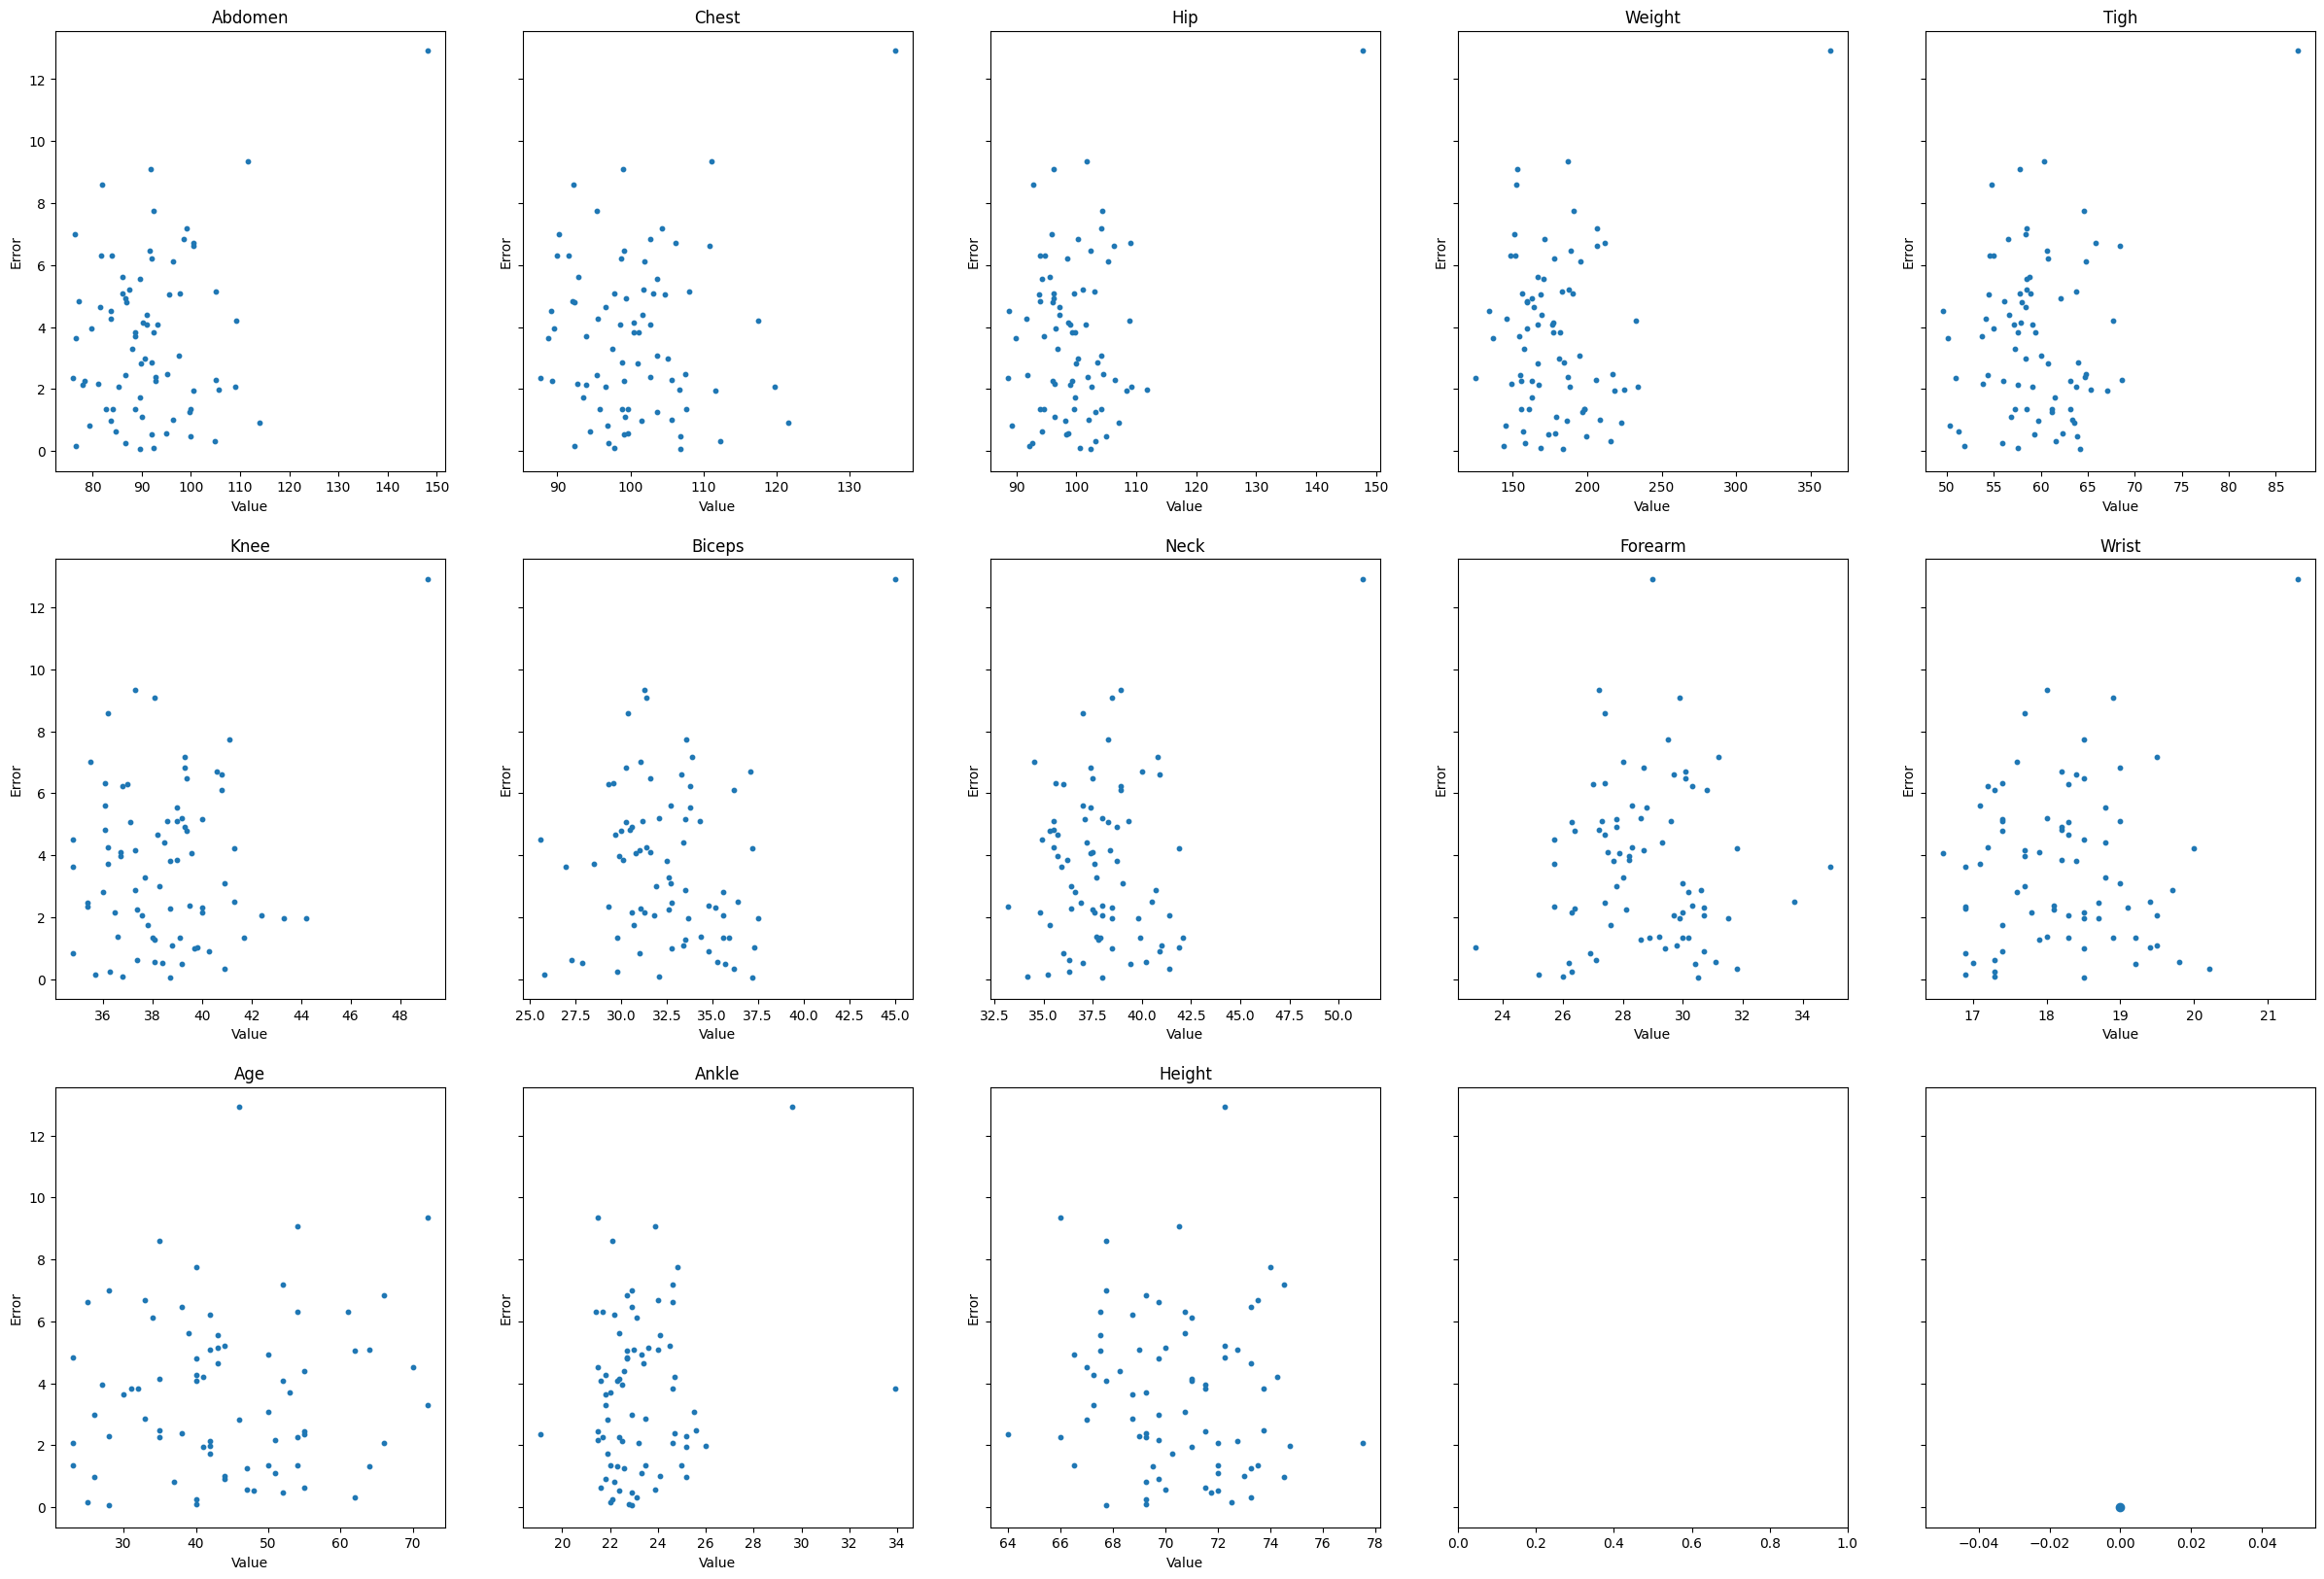

In [62]:
feature_names = ['Abdomen', 'Chest', 'Hip', 'Weight', 'Tigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
fig2, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(30,20))
y_axe = bodyfat_erro['y_test']-bodyfat_erro['y_pred']
y_axe = y_axe.abs()

ax1.scatter(abdomen, y_axe, s=10)
ax2.scatter(chest, y_axe, s=10)
ax3.scatter(hip, y_axe, s=10)
ax4.scatter(weight, y_axe, s=10)
ax5.scatter(thigh, y_axe, s=10)
ax6.scatter(knee, y_axe, s=10)
ax7.scatter(biceps, y_axe, s=10)
ax8.scatter(neck, y_axe, s=10)
ax9.scatter(forearm, y_axe, s=10)
ax10.scatter(wrist, y_axe, s=10)
ax11.scatter(age, y_axe, s=10)
ax12.scatter(ankle, y_axe, s=10)
ax13.scatter(height, y_axe, s=10)
# ax14.scatter(y_test,y, s=10)
ax15.scatter(0,0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]
for i in range(len(feature_names)):
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Error')

In [63]:
# MEAN ERROR (ALL TEST SET)
count_all = bodyfat_erro['erro'].count()
all = bodyfat_erro['erro'] = bodyfat_erro['erro'].abs()
all = all.mean()
print('For ALL data set''\n'
      'Available sample:' , count_all, '\n'
      'Mean Error:' , all.round(2), '\n')

# MEAN ERROR ULTRA LEAN (5 - 8)
ultra_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] >= 5) & (bodyfat_erro['BodyFat'] <= 8)]
count_ultra_lean = ultra_lean['erro'].count()
ultra_lean = ultra_lean['erro'].abs()
ultra_lean = ultra_lean.mean()
print('Moderately Lean (5% to 8%)''\n'
      'Available sample:' , count_ultra_lean, '\n'
      'Mean Error:' , ultra_lean.round(2), '\n')

# MEAN ERROR LEAN (8 - 12) 
lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 8) & (bodyfat_erro['BodyFat'] <= 12)]
count_lean = lean['erro'].count()
lean = lean['erro'].abs()
lean = lean.mean()
print('Moderately Lean (8% to 12%)''\n'
      'Available sample:' , count_lean, '\n'
      'Mean Error:' , lean.round(2), '\n')

# MEAN ERROR MODERATELY LEAN (12 - 20)
moderately_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 12) & (bodyfat_erro['BodyFat'] <= 20)]
count_moderately_lean = moderately_lean['erro'].count()
moderately_lean = moderately_lean['erro'].abs()
moderately_lean = moderately_lean.mean()
print('Moderately Lean (12% to 20%)''\n'
      'Available sample:' , count_moderately_lean, '\n'
      'Mean Error:' , moderately_lean.round(2), '\n')

# MEAN ERROR EXCESS FAT (20 - 30)
excess_fat = bodyfat_erro[(bodyfat_erro['BodyFat'] > 20) & (bodyfat_erro['BodyFat'] <= 30)]
count_excess_fat = excess_fat['erro'].count()
excess_fat = excess_fat['erro'].abs()
excess_fat = excess_fat.mean()
print('Excess Fat (20% to 30%)''\n'
      'Available sample:' , count_excess_fat, '\n'
      'Mean Error:' , excess_fat.round(2))

For ALL data set
Available sample: 76 
Mean Error: 3.66 

Moderately Lean (5% to 8%)
Available sample: 4 
Mean Error: 1.38 

Moderately Lean (8% to 12%)
Available sample: 9 
Mean Error: 3.67 

Moderately Lean (12% to 20%)
Available sample: 29 
Mean Error: 3.54 

Excess Fat (20% to 30%)
Available sample: 28 
Mean Error: 3.79


In [64]:
# MEAN ERROR ULTRA LEAN (18 - 25)
teen = bodyfat_erro[(bodyfat_erro['Age'] >= 18) & (bodyfat_erro['Age'] <= 25)]
count_teen = teen['erro'].count()
teen = teen['erro'].abs()
teen = teen.mean()
print('Moderately Lean (18% to 25%)''\n'
      'Available sample:' , count_teen, '\n'
      'Mean Error:' , teen.round(2), '\n')


# MEAN ERROR ULTRA LEAN (25 - 35)
adult = bodyfat_erro[(bodyfat_erro['Age'] > 25) & (bodyfat_erro['Age'] <= 35)]
count_adult = adult['erro'].count()
adult = adult['erro'].abs()
adult = adult.mean()
print('Moderately Lean (25% to 30%)''\n'
      'Available sample:' , count_adult, '\n'
      'Mean Error:' , adult.round(2), '\n')


      
# MEAN ERROR ULTRA LEAN (35 - 50)
old = bodyfat_erro[(bodyfat_erro['Age'] > 35) & (bodyfat_erro['Age'] <= 50)]
count_old = old['erro'].count()
old = old['erro'].abs()
old = old.mean()
print('Moderately Lean (25% to 30%)''\n'
      'Available sample:' , count_old, '\n'
      'Mean Error:' , old.round(2), '\n')

Moderately Lean (18% to 25%)
Available sample: 5 
Mean Error: 3.0 

Moderately Lean (25% to 30%)
Available sample: 16 
Mean Error: 3.86 

Moderately Lean (25% to 30%)
Available sample: 31 
Mean Error: 3.54 



In [65]:
greater30 = bodyfat_erro[(bodyfat_erro['BodyFat'] > 30)]
greater30['erro'].count()

4

In [66]:
# print("Model coeficients: \n")
# for i in range(x.shape[1]):
#     print(x.columns[i], "=", linRegModel(x_train).coef_[i].round(5))

### Shap

In [67]:
# import shap

# x100 = shap.utils.sample(x, 100)

In [68]:
# # compute the SHAP values for the linear model
# explainer = shap.Explainer(linRegModel(x_train).predict, x100)
# shap_values = explainer(x_train)

# # make a standard partial dependence plot
# sample_ind = 20

In [69]:
# shap.plots.beeswarm(shap_values, max_display = 14)

In [70]:
# some_data = x.iloc[:5]
# some_labels = y[:5]
# print('Predictions:\t', lin_reg.predict(some_data))
# print('Labels:\t\t', list(some_labels))

# Decision Tree Regression

### Model

In [71]:
# Model

from sklearn.tree import DecisionTreeRegressor

def treeRegModel(x_train, y_train = y_train):
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    scores = cross_val_score(tree_reg, x_train, y_train, scoring = 'r2', cv = 10)

    return tree_reg

In [72]:
# # Evaluating Model

# def evaluatingTreeReg(list, x_train, x_test):
#     # print(scores)
#     # validacao_cruzada = cross_val_predict(y_pred, x_train, y)
#     list.append(explained_variance_score(y_test, y_pred).round(4))
#     list.append(max_error(y_test, y_pred).round(4))
#     list.append(mean_absolute_error(y_test, y_pred).round(4))
#     list.append(mean_squared_error(y_test, y_pred).round(4))
#     list.append(mean_squared_log_error(y_test, y_pred).round(4))
#     list.append(median_absolute_error(y_test, y_pred).round(4))
#     list.append(r2_score(y_test, y_pred).round(4))
#     list.append(mean_absolute_percentage_error(y_test, y_pred).round(4))
#     df=pd.DataFrame(list)
#     list.clear()
#     print(df.to_string(index=False))

# y_pred = treeRegModel(x_train).predict(x_test)
# contador = 1
# listPearson = []
# listRFE = []
# listLasso = []
# for i in range(13):
    
#     x_pearson = x[corr_feat[:contador]]
#     x_rfe = x[rfe_feat[:contador]]
#     x_lasso = x[lasso_feat[:contador]]

#     x_pearson_train, x_pearson_test, y_train, y_test = train_test_split(x_pearson, y, test_size=0.3, random_state=42)
#     x_rfe_train, x_rfe_test, y_train, y_test = train_test_split(x_rfe, y, test_size=0.3, random_state=42)
#     x_lasso_train, x_lasso_test, y_train, y_test = train_test_split(x_lasso, y, test_size=0.3, random_state=42)

    
#     print('For {} features'.format(contador))
#     print("Pearson")
#     evaluatingModel(listPearson, x_pearson_train, x_pearson_test)
#     print("RFE")
#     evaluatingModel(listRFE, x_rfe_train, x_rfe_test)
#     print("Lasso")
#     evaluatingModel(listLasso, x_lasso_train, x_lasso_test)

#     contador += 1




In [73]:
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit

model = DecisionTreeRegressor()
k_folds = KFold(n_splits = 5)
ss = ShuffleSplit(train_size=0.7, test_size=0.3, n_splits = 3)
scores = cross_val_score(model, features, labels, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.47940913 0.39278275 0.35520809]
Average CV Score:  0.4091333217025766
Number of CV Scores used in Average:  3


In [74]:
# Evaluating Model

evs = []
max_e = []
mean_ae = []
mse = []
msle = []
mae = []
r2 = []
mape = []

def evaluatingTreeReg( x_train, x_test):
    y_pred = treeRegModel(x_train).predict(x_test)
    evs.append(explained_variance_score(y_test, y_pred).round(4))
    evs_cv.append(cvScores(x_train, x_test, 'explained_variance').round(4))
    max_e.append(max_error(y_test, y_pred).round(4))
    max_e_cv.append(cvScores(x_train, x_test, 'max_error').round(4))
    mean_ae.append(mean_absolute_error(y_test, y_pred).round(4))
    mean_ae_cv.append(cvScores(x_train, x_test, 'neg_mean_absolute_error').round(4))
    mse.append(mean_squared_error(y_test, y_pred).round(4))
    mse_cv.append(cvScores(x_train, x_test, 'neg_mean_squared_error').round(4))
    msle.append(mean_squared_log_error(y_test, y_pred).round(4))
    msle_cv.append(cvScores(x_train, x_test, 'neg_mean_squared_log_error').round(4))
    mae.append(median_absolute_error(y_test, y_pred).round(4))
    mae_cv.append(cvScores(x_train, x_test, 'neg_median_absolute_error').round(4))
    r2.append(r2_score(y_test, y_pred).round(4))
    r2_cv.append(cvScores(x_train, x_test, 'r2').round(4))
    mape.append(mean_absolute_percentage_error(y_test, y_pred).round(4))
    mape_cv.append(cvScores(x_train, x_test, 'neg_mean_absolute_percentage_error').round(4))
    df = pd.DataFrame()
    df.insert(0, 'EVS', evs_cv)
    df.insert(1, 'Max E', max_e_cv)
    df.insert(2, 'Mean AE', mean_ae_cv)
    df.insert(3, 'MSE', mse_cv)
    df.insert(4, 'MSLE', msle_cv)
    df.insert(5, 'MAE', mae_cv)
    df.insert(6, 'R2', r2_cv)
    df.insert(7, 'MAPE', mape_cv)
    df.to_csv('erros.csv')

contador = 1
listPearson = []
listRFE = []
listLasso = []
for i in range(13):
    x_pearson = x[corr_feat[:contador]]
    x_rfe = x[rfe_feat[:contador]]
    x_lasso = x[lasso_feat[:contador]]

    x_pearson_train, x_pearson_test, y_train, y_test = train_test_split(x_pearson, y, test_size=0.3, random_state=42)
    x_rfe_train, x_rfe_test, y_train, y_test = train_test_split(x_rfe, y, test_size=0.3, random_state=42)
    x_lasso_train, x_lasso_test, y_train, y_test = train_test_split(x_lasso, y, test_size=0.3, random_state=42)


# cada hora comentar um para gerar o dataframe na ordem certa
    cvScores()
    evaluatingTreeReg(x_pearson_train, x_pearson_test)
    # evaluatingTreeReg(x_rfe_train, x_rfe_test)
    # evaluatingTreeReg(x_lasso_train, x_lasso_test)

    contador += 1

TypeError: cvScores() missing 3 required positional arguments: 'x_train', 'x_test', and 'criteria'

### Shap

In [ ]:
# explainer2 = shap.Explainer(tree_reg.predict, x100)
# shap_values2 = explainer2(x)

# shap.plots.waterfall(shap_values2[sample_ind], max_display = 14)

# Random Forest

### Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Model

# Model

def treeRegModel(x_train, y_train = y_train):
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    scores = cross_val_score(tree_reg, x_train, y_train, scoring = 'r2', cv = 10)

    return tree_reg



def rfModel(x_train, y_train = y_train):
    rf = RandomForestRegressor(random_state = 42)
    rf.fit(x_train, y_train)
    return rf

In [ ]:
# Evaluating Model

def evaluatingRF(feature_count, x_train, x_test):
    if feature_count < 2:
        print("For {} feature:".format(feature_count))
    else:
        print("For {} features:".format(feature_count))
    y_pred = rfModel(x_train).predict(x_test)
    print(explained_variance_score(y_test, y_pred).round(4))
    print(max_error(y_test, y_pred).round(4))
    print(mean_absolute_error(y_test, y_pred).round(4))
    print(mean_squared_error(y_test, y_pred).round(4))
    print(mean_squared_log_error(y_test, y_pred).round(4))
    print(median_absolute_error(y_test, y_pred).round(4))
    print(r2_score(y_test, y_pred).round(4))
    print(mean_absolute_percentage_error(y_test, y_pred).round(4), '\n')
    # y_pred_df = pd.DataFrame(y_pred, index=x_test.index)
    # df_teste = pd.concat([y_test, y_pred_df], axis=1)
    # print(df_teste)
    return 0

print('Random Forest\n')
print("Pearson")
evaluatingRF(5, x_pearson_train, x_pearson_test)
print("RFE")
evaluatingRF(5, x_rfe_train, x_rfe_test)
print("Lasso")
evaluatingRF(5, x_lasso_train, x_lasso_test)
print("Correlation")
# evaluatingRF(1, x1_train, x1_test)
# evaluatingRF(2, x2_train, x2_test)
# evaluatingRF(3, x3_train, x3_test)
# evaluatingRF(4, x4_train, x4_test)
evaluatingRF(5, x5_train, x5_test)
# evaluatingRF(6, x6_train, x6_test)
# evaluatingRF(7, x7_train, x7_test)
# evaluatingRF(8, x8_train, x8_test)
# evaluatingRF(9, x9_train, x9_test)
# evaluatingRF(10, x10_train, x10_test)
# evaluatingRF(11, x11_train, x11_test)
# evaluatingRF(12, x12_train, x12_test)
# evaluatingRF(13, x_train, x_test)


Random Forest

Pearson
For 5 features:
0.6858
12.12
3.4863
19.1986
0.0876
3.1525
0.6858
0.2702 

RFE
For 5 features:
0.6786
12.501
3.5442
19.6388
0.091
3.218
0.6786
0.2769 

Lasso
For 5 features:
0.6819
12.045
3.526
19.451
0.0885
3.119
0.6817
0.2724 

Correlation
For 5 features:
0.6321
11.412
3.8741
22.4801
0.1021
3.655
0.6321
0.2995 



0

### Insights

In [ ]:
from array import array


y_pred = rfModel(x_train).predict(x_test)
mape =mean_absolute_percentage_error(y_test, y_pred).round(4)*100

bodyfat = bodyfat.filter(items = x_test.index, axis=0)

y_pred = y_pred.tolist()
d = {'y_test': y_test.round(2), 'y_pred': y_pred}
erro = pd.DataFrame(data=d)

bodyfat_erro = pd.concat([bodyfat, erro], axis=1)

bodyfat_erro['erro'] = bodyfat_erro['y_test'] - bodyfat_erro['y_pred']

In [ ]:
weight = [bodyfat_erro.Weight]
height = [bodyfat_erro.Height]
age = [bodyfat_erro.Age]
abdomen = [bodyfat_erro.Abdomen]
neck = [bodyfat_erro.Neck]
chest = [bodyfat_erro.Chest]
hip = [bodyfat_erro.Hip]
thigh = [bodyfat_erro.Thigh]
knee = [bodyfat_erro.Knee]
ankle = [bodyfat_erro.Ankle]
biceps = [bodyfat_erro.Biceps]
forearm = [bodyfat_erro.Forearm]
wrist = [bodyfat_erro.Wrist]

ValueError: x and y must be the same size

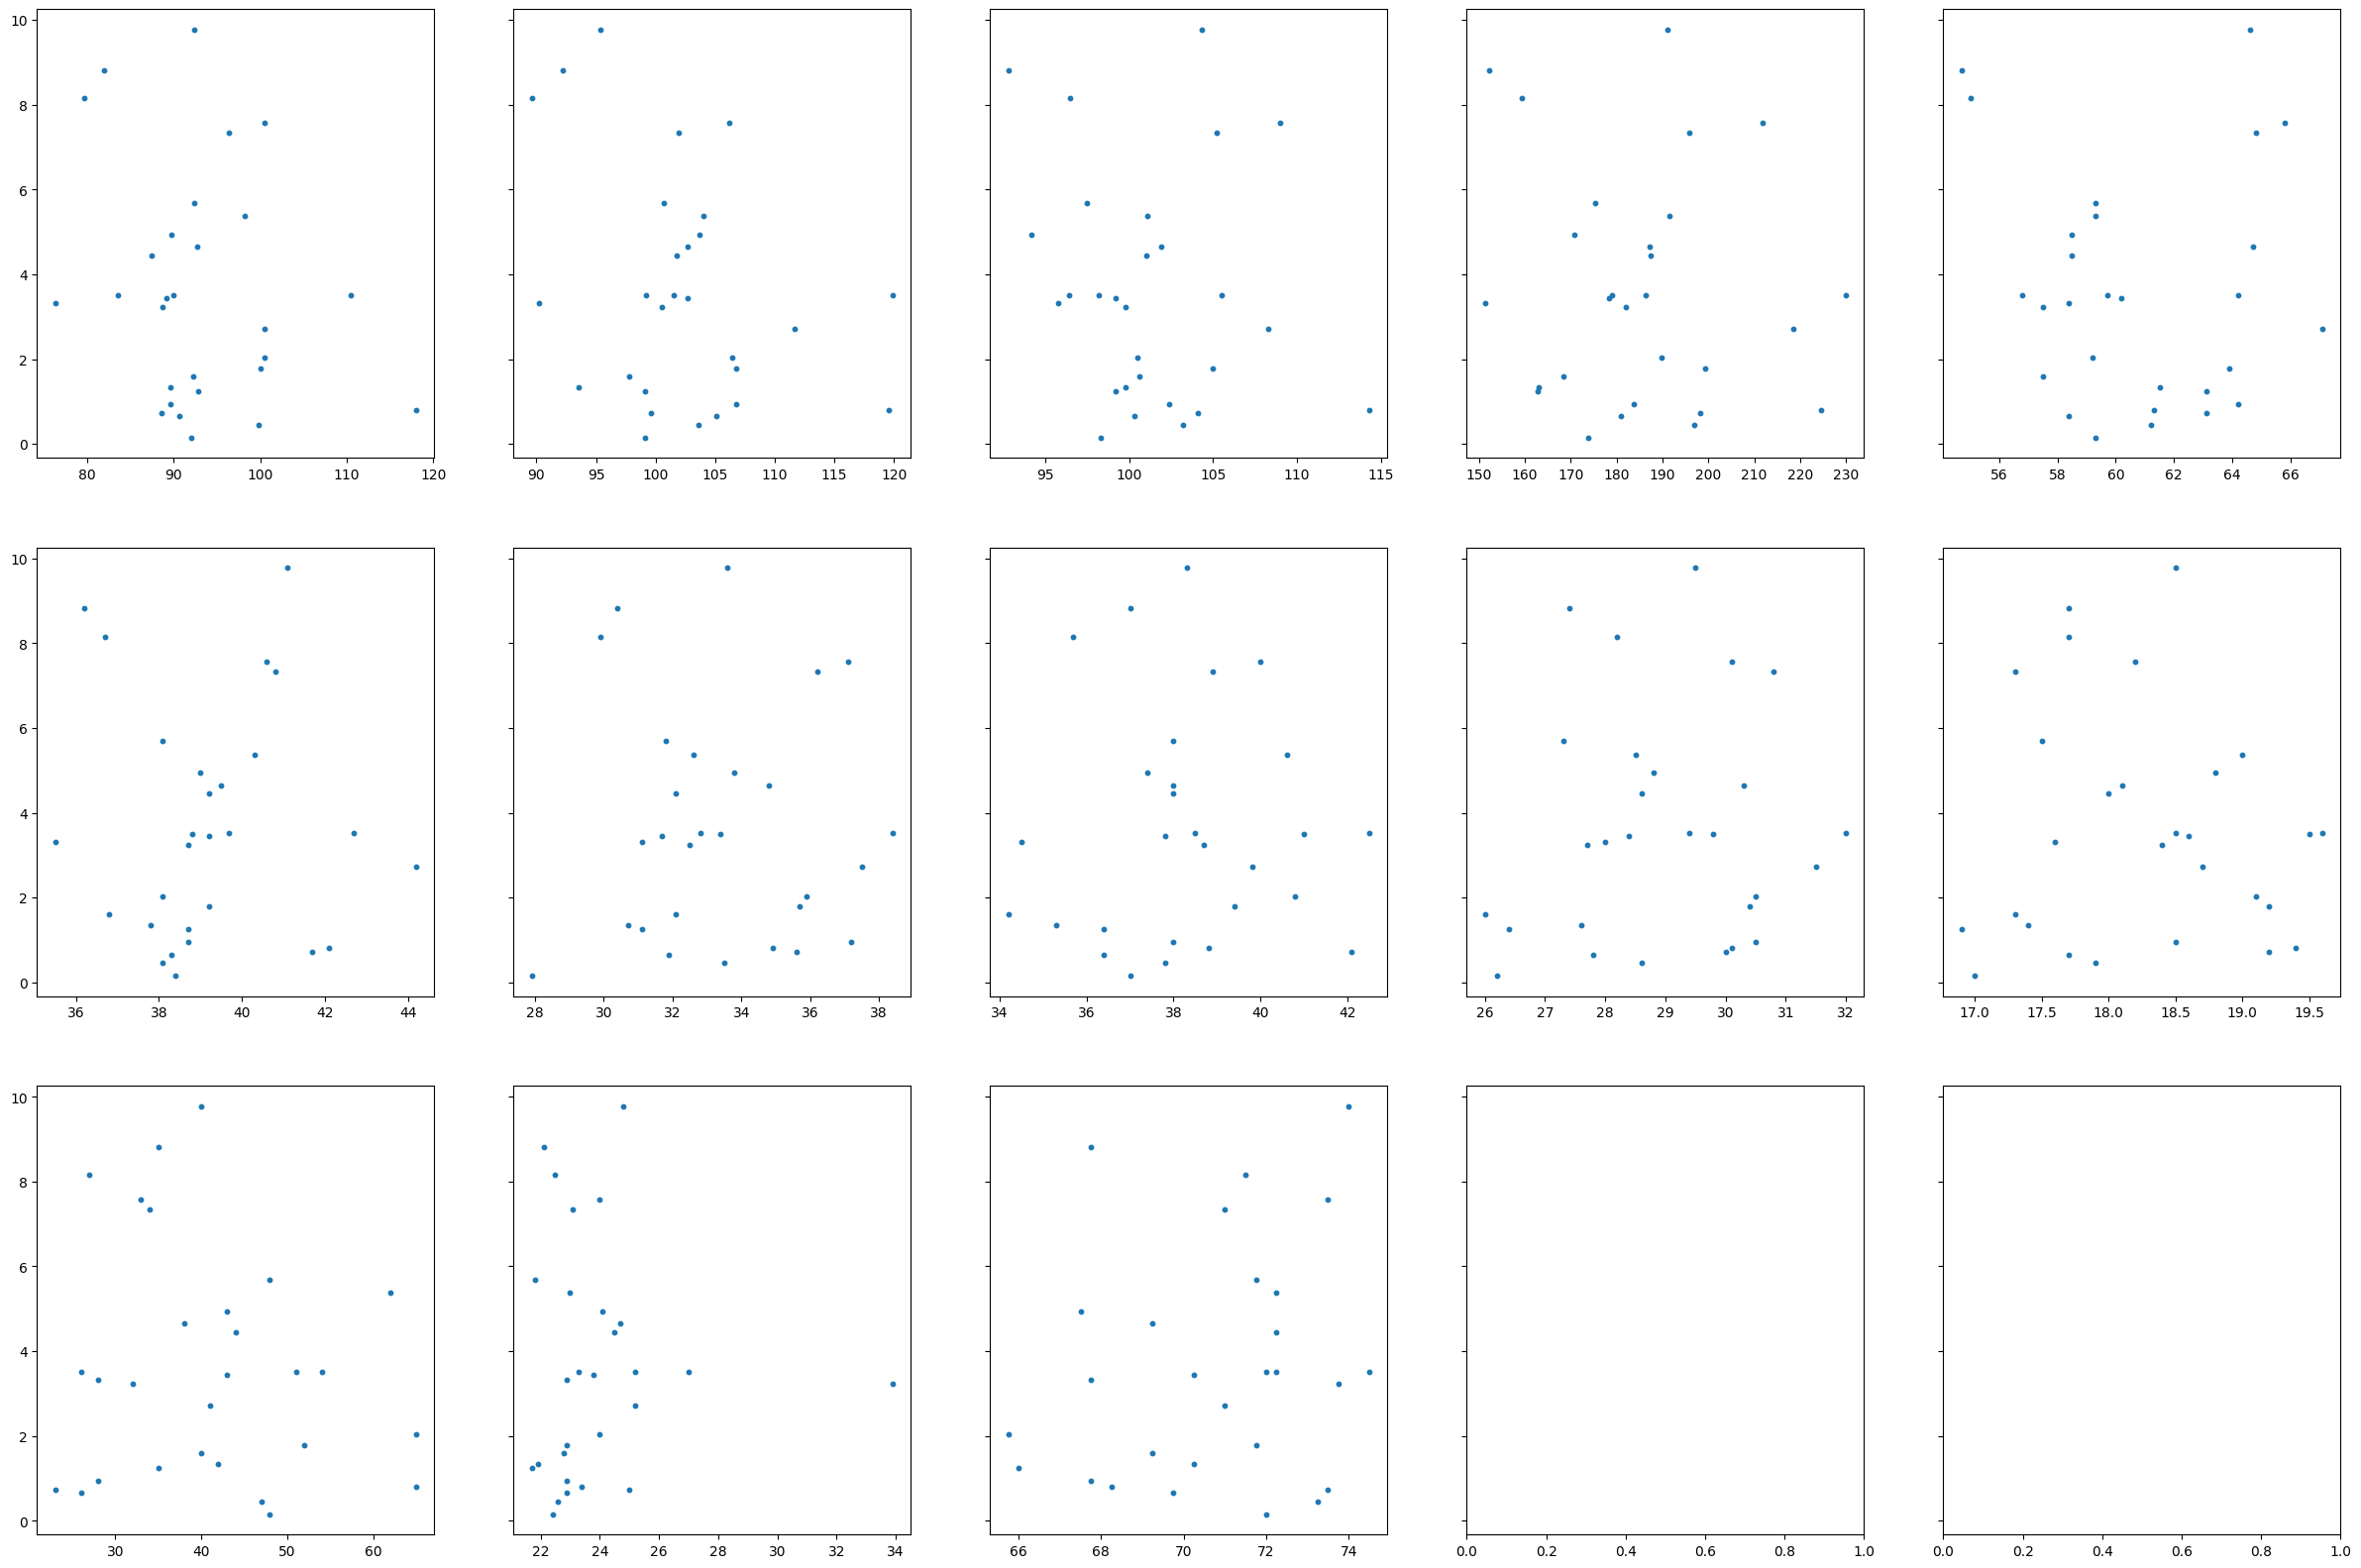

In [ ]:
feature_names = ['Abdomen', 'Chest', 'Hip', 'Weight', 'Tigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
fig2, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(30,20))
y = bodyfat_erro['y_test']-bodyfat_erro['y_pred']
y = y.abs()

ax1.scatter(abdomen, y, s=10)
ax2.scatter(chest, y, s=10)
ax3.scatter(hip, y, s=10)
ax4.scatter(weight, y, s=10)
ax5.scatter(thigh, y, s=10)
ax6.scatter(knee, y, s=10)
ax7.scatter(biceps, y, s=10)
ax8.scatter(neck, y, s=10)
ax9.scatter(forearm, y, s=10)
ax10.scatter(wrist, y, s=10)
ax11.scatter(age, y, s=10)
ax12.scatter(ankle, y, s=10)
ax13.scatter(height, y, s=10)
ax14.scatter(y_test,y, s=10)
ax15.scatter(0,0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]
for i in range(len(feature_names)):
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Error')

In [ ]:
# MEAN ERROR (ALL TEST SET)
count_all = bodyfat_erro['erro'].count()
all = bodyfat_erro['erro'] = bodyfat_erro['erro'].abs()
all = all.mean()
print('For ALL data set''\n'
      'Available sample:' , count_all, '\n'
      'Mean Error:' , all.round(2),'\n')

# MEAN ERROR ULTRA LEAN (5 - 8)
ultra_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] >= 5) & (bodyfat_erro['BodyFat'] <= 8)]
count_ultra_lean = ultra_lean['erro'].count()
ultra_lean = ultra_lean['erro'].abs()
ultra_lean = ultra_lean.mean()
print('Moderately Lean (5% to 8%)''\n'
      'Available sample:' , count_ultra_lean, '\n'
      'Mean Error:' , ultra_lean.round(2),'\n')

# MEAN ERROR LEAN (8 - 12) 
lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 8) & (bodyfat_erro['BodyFat'] <= 12)]
count_lean = lean['erro'].count()
lean = lean['erro'].abs()
lean = lean.mean()
print('Moderately Lean (8% to 12%)''\n'
      'Available sample:' , count_lean, '\n'
      'Mean Error:' , lean.round(2),'\n')

# MEAN ERROR MODERATELY LEAN (12 - 20)
moderately_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 12) & (bodyfat_erro['BodyFat'] <= 20)]
count_moderately_lean = moderately_lean['erro'].count()
moderately_lean = moderately_lean['erro'].abs()
moderately_lean = moderately_lean.mean()
print('Moderately Lean (12% to 20%)''\n'
      'Available sample:' , count_moderately_lean, '\n'
      'Mean Error:' , moderately_lean.round(2),'\n')

# MEAN ERROR EXCESS FAT (20 - 30)
excess_fat = bodyfat_erro[(bodyfat_erro['BodyFat'] > 20) & (bodyfat_erro['BodyFat'] <= 30)]
count_excess_fat = excess_fat['erro'].count()
excess_fat = excess_fat['erro'].abs()
excess_fat = excess_fat.mean()
print('Excess Fat (20% to 30%)''\n'
      'Available sample:' , count_excess_fat, '\n'
      'Mean Error:' , excess_fat.round(2),'\n')

For ALL data set
Available sample: 76 
Mean Error: 3.62 

Moderately Lean (5% to 8%)
Available sample: 4 
Mean Error: 3.6 

Moderately Lean (8% to 12%)
Available sample: 9 
Mean Error: 2.15 

Moderately Lean (12% to 20%)
Available sample: 29 
Mean Error: 4.09 

Excess Fat (20% to 30%)
Available sample: 28 
Mean Error: 3.45 



In [ ]:
# # Feature Selection

# from skfeature.function.similarity_based import fisher_score

In [ ]:
# from sklearn import metrics
# metrics.get_scorer_names()

### Shap

In [ ]:
# # SHAP

# explainer_rf = shap.Explainer(rf.predict, x_test)
# shap_values_rf = explainer_rf(x_test)

# shap.plots.waterfall(shap_values_rf[sample_ind], max_display = 14)

# XGBoost

### Model

In [ ]:
# Model
import xgboost as xgb
from xgboost import XGBRegressor

def xgboostModel(x_train, y_train = y_train):
    xgboost = XGBRegressor(max_depth = 5)
    xgboost.fit(x_train, y_train)
    return xgboost

In [ ]:
# Evaluating Model

def evaluatingXGBoost(feature_count, x_train, x_test):
    if feature_count < 2:
        print("For {} feature:".format(feature_count))
    else:
        print("For {} features:".format(feature_count))
    y_pred = xgboostModel(x_train).predict(x_test)
    print(explained_variance_score(y_test, y_pred).round(4))
    print(max_error(y_test, y_pred).round(4))
    print(mean_absolute_error(y_test, y_pred).round(4))
    print(mean_squared_error(y_test, y_pred).round(4))
    print(mean_squared_log_error(y_test, y_pred).round(4))
    print(median_absolute_error(y_test, y_pred).round(4))
    print(r2_score(y_test, y_pred).round(4))
    print(mean_absolute_percentage_error(y_test, y_pred).round(4), '\n') 
#     print('Absolute Error Score: ',d2_absolute_error_score(y_test, y_pred), '\n')
    return 0


print('XG Boost\n')
evaluatingXGBoost(5, x_pearson_train, x_pearson_test)
evaluatingXGBoost(5, x_chi_train, x_chi_test)
evaluatingXGBoost(5, x_rfe_train, x_rfe_test)
evaluatingXGBoost(5, x_lasso_train, x_lasso_test)
evaluatingXGBoost(5, x_embeded_rf_train, x_embeded_rf_test)
# evaluatingXGBoost(1, x1_train, x1_test)
# evaluatingXGBoost(2, x2_train, x2_test)
# evaluatingXGBoost(3, x3_train, x3_test)
# evaluatingXGBoost(4, x4_train, x4_test)
# evaluatingXGBoost(5, x5_train, x5_test)
# evaluatingXGBoost(6, x6_train, x6_test)
# evaluatingXGBoost(7, x7_train, x7_test)
# evaluatingXGBoost(8, x8_train, x8_test)
# evaluatingXGBoost(9, x9_train, x9_test)
# evaluatingXGBoost(10, x10_train, x10_test)
# evaluatingXGBoost(11, x11_train, x11_test)
# evaluatingXGBoost(12, x12_train, x12_test)
# evaluatingXGBoost(13, x_train, x_test)

XG Boost

For 5 features:
0.5665
12.76
3.8943
22.442
0.1146
3.2472
0.5664
0.2882 



NameError: name 'x_chi_train' is not defined

### Insights

In [ ]:
from array import array


y_pred = rfModel(x_train).predict(x_test)
mape =mean_absolute_percentage_error(y_test, y_pred).round(4)*100

bodyfat = bodyfat.filter(items = x_test.index, axis=0)

y_pred = y_pred.tolist()
d = {'y_test': y_test.round(2), 'y_pred': y_pred}
erro = pd.DataFrame(data=d)

bodyfat_erro = pd.concat([bodyfat, erro], axis=1)

bodyfat_erro['erro'] = bodyfat_erro['y_test'] - bodyfat_erro['y_pred']

In [ ]:
weight = [bodyfat_erro.Weight]
height = [bodyfat_erro.Height]
age = [bodyfat_erro.Age]
abdomen = [bodyfat_erro.Abdomen]
neck = [bodyfat_erro.Neck]
chest = [bodyfat_erro.Chest]
hip = [bodyfat_erro.Hip]
thigh = [bodyfat_erro.Thigh]
knee = [bodyfat_erro.Knee]
ankle = [bodyfat_erro.Ankle]
biceps = [bodyfat_erro.Biceps]
forearm = [bodyfat_erro.Forearm]
wrist = [bodyfat_erro.Wrist]

In [ ]:
feature_names = ['Abdomen', 'Chest', 'Hip', 'Weight', 'Tigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
fig2, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(30,20))
y = bodyfat_erro['y_test']-bodyfat_erro['y_pred']
y = y.abs()

ax1.scatter(abdomen, y, s=10)
ax2.scatter(chest, y, s=10)
ax3.scatter(hip, y, s=10)
ax4.scatter(weight, y, s=10)
ax5.scatter(thigh, y, s=10)
ax6.scatter(knee, y, s=10)
ax7.scatter(biceps, y, s=10)
ax8.scatter(neck, y, s=10)
ax9.scatter(forearm, y, s=10)
ax10.scatter(wrist, y, s=10)
ax11.scatter(age, y, s=10)
ax12.scatter(ankle, y, s=10)
ax13.scatter(height, y, s=10)
ax14.scatter(y_test,y, s=10)
ax15.scatter(0,0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]
for i in range(len(feature_names)):
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Error')

plt.show()

In [ ]:
# MEAN ERROR (ALL TEST SET)
count_all = bodyfat_erro['erro'].count()
all = bodyfat_erro['erro'] = bodyfat_erro['erro'].abs()
all = all.mean()
print('For ALL data set''\n'
      'Available sample:' , count_all, '\n'
      'Mean Error:' , all.round(2),'\n')

# MEAN ERROR ULTRA LEAN (5 - 8)
ultra_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] >= 5) & (bodyfat_erro['BodyFat'] <= 8)]
count_ultra_lean = ultra_lean['erro'].count()
ultra_lean = ultra_lean['erro'].abs()
ultra_lean = ultra_lean.mean()
print('Moderately Lean (5% to 8%)''\n'
      'Available sample:' , count_ultra_lean, '\n'
      'Mean Error:' , ultra_lean.round(2),'\n')

# MEAN ERROR LEAN (8 - 12) 
lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 8) & (bodyfat_erro['BodyFat'] <= 12)]
count_lean = lean['erro'].count()
lean = lean['erro'].abs()
lean = lean.mean()
print('Moderately Lean (8% to 12%)''\n'
      'Available sample:' , count_lean, '\n'
      'Mean Error:' , lean.round(2),'\n')

# MEAN ERROR MODERATELY LEAN (12 - 20)
moderately_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 12) & (bodyfat_erro['BodyFat'] <= 20)]
count_moderately_lean = moderately_lean['erro'].count()
moderately_lean = moderately_lean['erro'].abs()
moderately_lean = moderately_lean.mean()
print('Moderately Lean (12% to 20%)''\n'
      'Available sample:' , count_moderately_lean, '\n'
      'Mean Error:' , moderately_lean.round(2),'\n')

# MEAN ERROR EXCESS FAT (20 - 30)
excess_fat = bodyfat_erro[(bodyfat_erro['BodyFat'] > 20) & (bodyfat_erro['BodyFat'] <= 30)]
count_excess_fat = excess_fat['erro'].count()
excess_fat = excess_fat['erro'].abs()
excess_fat = excess_fat.mean()
print('Excess Fat (20% to 30%)''\n'
      'Available sample:' , count_excess_fat, '\n'
      'Mean Error:' , excess_fat.round(2),'\n')

### Shap

In [ ]:
# explainer_xgb = shap.Explainer(xgboost.predict, x100)
# shap_values_xgb = explainer_xgb(x)

# shap.plots.waterfall(shap_values_xgb[sample_ind], max_display = 14)

# Support Vector Regressor

### Model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #???
regressor.fit(x, y)

In [ ]:
y_pred = regressor.predict(x_test)
print('Explained Variance Score: ',explained_variance_score(y_test, y_pred))
print('Max Error: ',max_error(y_test, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred))
print('Mean Squared Log Error: ',mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error: ',median_absolute_error(y_test, y_pred))
print('R2: ',r2_score(y_test, y_pred))
print('Mean Absolute Percentage Error: ',mean_absolute_percentage_error(y_test, y_pred), '\n') 
# print('Absolute Error Score: ',d2_absolute_error_score(y_test, y_pred), )